Autopsy of first build.

Purpose: Find out why it didn't fly (Identifty the problem so we know what to solve for in the next build)

# Test flight

<img src="img/flying00.png" alt="Pic here" style="width:400px">
So the canard is at a negative angle of attack.
<img src="img/IMG_3100.JPG" alt="Pic here" style="width:400px">
Results: Inherently unstable.
<img src="img/IMG_3101.JPG" alt="Pic here" style="width:400px">
Results: =D

I believe this only works if the Lift (not CL) slope of the wing is stepper than the canard's.

# Build description

<img src="img/IMG_3102.JPG" alt="Pic here" style="width:800px">
<img src="img/IMG_3103.JPG" alt="Pic here" style="width:400px">
<img src="img/IMG_3104.JPG" alt="Pic here" style="width:400px">
<img src="img/IMG_3105.JPG" alt="Pic here" style="width:400px">
<img src="img/IMG_3106.JPG" alt="Pic here" style="width:400px">
<img src="img/IMG_3107.JPG" alt="Pic here" style="width:800px">
<img src="img/IMG_3109.JPG" alt="Pic here" style="width:400px">
<img src="img/IMG_3110.JPG" alt="Pic here" style="width:800px">

# Thrust test

<img src="img/thrust.png" alt="Pic here" style="width:700px">

I measured the thrust against a scale of battery #1, which is charged at 8.15V (Is this the same one we used for flying yesterday?)

In [4]:
g = 9.8
zero = 630 # grams
read1 = 641 # quarter throttle
read2 = 744 # half throttle
read3 = 830 # three-quarter throttle
read4 = 872 # full throttle

label = ["quarter", "half", "three-quarter", "full"]
for (i,read) in enumerate([read1, read2, read3, read4])
    val = (read-zero)/1000*g
    println("$(round(val,2)) N at $(label[i]) throttle")
end

0.11 N at quarter throttle
1.12 N at half throttle
1.96 N at three-quarter throttle
2.37 N at full throttle


Here is a second test:

In [1]:
g = 9.8
zero = 630 # grams
read1 = 682 # quarter throttle
read2 = 740 # half throttle
read3 = 790 # three-quarter throttle
read4 = 875 # full throttle

label = ["quarter", "half", "three-quarter", "full"]
for (i,read) in enumerate([read1, read2, read3, read4])
    val = (read-zero)/1000*g
    println("$(round(val,2)) N at $(label[i]) throttle")
end

0.51 N at quarter throttle
1.08 N at half throttle
1.57 N at three-quarter throttle
2.4 N at full throttle


Next we opened the box on both ends and in an attempt to reduce obstruction
<img src="img/test02.png" alt="Pic here" style="width:700px">

In [2]:
g = 9.8
zero = 268 # grams
read1 = 305 # quarter throttle
read2 = 395 # half throttle
read3 = 445 # three-quarter throttle
read4 = 570 # full throttle

label = ["quarter", "half", "three-quarter", "full"]
for (i,read) in enumerate([read1, read2, read3, read4])
    val = (read-zero)/1000*g
    println("$(round(val,2)) N at $(label[i]) throttle")
end

0.36 N at quarter throttle
1.24 N at half throttle
1.73 N at three-quarter throttle
2.96 N at full throttle


That's an increase of about 0.6 N on full throttle

XFLR5 shows that our CD during take-off is about 0.065, resulting in the following drag:

In [28]:
CD = 0.065
Sref = 0.23329
V = 8.5
rho = 1.1
D = CD*(0.5*rho*V^2*Sref)

println("Drag at $V m/s: $(round(D,2)) (N)")

Drag at 8.5 m/s: 0.6 (N)


Hence, our motors should be enough to get to climb

# Structural failure

<img src="img/failure00.JPG" alt="Pic here" style="width:700px">
<img src="img/failure01.JPG" alt="Pic here" style="width:700px">
<img src="img/IMG_3096.JPG" alt="Pic here" style="width:700px">
<img src="img/failure02.JPG" alt="Pic here" style="width:700px">

1. **Crack:** This is a good failure, it cracked without falling apart.
2. **Critical failure:** Canard's twin boom ripped off the wing.
3. **Crack:** All good.
4. **Critical failure:** Winglet ripped off tip of wing.
5. **Crack:** Tip of wing cracked and turned up. Did we fly like this in the last test?
6. **Crack:** Attachment of canard to twin boom ripped of along the the tips of the canard. I think this is better than having the canard breaking in half.

**SOLVE FOR**
* 2) Find a more structurally-sound way of attaching the twin boom. Would it be better to attach it to the fuselage instead of the wing? Also, the videos show the canard fluttering.
* 4) Mount the winglet to the wing's spar instead of just the foam.

# Predicting for failure

Let's go through the design process again with the exact build we fly and see if at any point our analysis should have pointed out that it was going to be unstable.

**MODELING MISTAKES**
* Wing span: We designed for 0.9 m in our analyses, but the actual build was 1.2 m.
* Wing sweep: We designed for 30deg, but the actual build is 20deg.
* Wing AOA: We designed for mounting the wing at an angle of attack of -5deg, but I believe we actually mounted at 0deg.
* Canard chord: We designed for a chord of 10cm, but the aileron made it an actual chord of 12cm.
* Canard twin-boom: We designed for a distance of 43.5cm from LE of main wing to LE of canard, but the actual build was 47cm.
* Canard AOA: We designed for mounting the canard at an angle of attack of 0.8deg, but I believe we actually mounted at 0deg, and in actual flight the twin boom deflect to at least -8deg (see pic below).

<img src="img/flying00.png" alt="Pic here" style="width:400px">

**FLIGHT CONDITIONS**
* Since the CG was way back, we put a 68g weight on the canard to move it bring the CG close to the wing's nose. I calculated that our weight during flight ended up being 680g.

I set up the wing at a negative angle of attack such that in addition to the root's twist the effective AOA of the wing's root is 0.

With the canard at no angle of attack I get this:
<img src="img/c0.png" alt="Pic here" style="width:1000px">
<img src="img/c0curves.png" alt="Pic here" style="width:1000px">
looking at the pitching moment, this should have been stable. However, it seems that it would be stable at an AOA of about 10degs. Definitely the plane would stall before that.

With the canard at a negative angle of attack of -5deg I get this:
<img src="img/cneg5.png" alt="Pic here" style="width:1000px">
<img src="img/cneg5curves.png" alt="Pic here" style="width:1000px">
which the pitching moment curve ends up being unstable. If we actually flew with the twin boom deflected down, it is possible we flew on this unstable configuration for the last flight.

# Redesign

## REDESIGN #1

If we shorten the twin boom (move the canard closer to the wing to a distance of 0.37m from LE to LE), the slope of Cm is more negative, and placing the canard at 2degs AOA the pitching moment stabilizes at about 2degs:

<img src="img/c2shorter.png" alt="Pic here" style="width:1000px">
<img src="img/c2shortercurves.png" alt="Pic here" style="width:1000px">

However, at 5m/s at AOA=2degs we only have a CL of 0.54, which gives the following lift:

In [11]:
M = (300 + 306 + 68)/1000
W = M*9.8
CL = 0.54
rho = 1.1
V = 5
Sref = 0.23329
L = CL * (0.5*rho*V^2*Sref)
println("Lift at $V (m/s): $(round(L,2)) (N)")
println("Lift needed: $(round(W, 2)) \t CL needed at $V (m/s): $(round( W/(0.5*rho*V^2*Sref) , 2 ))")

Lift at 5 (m/s): 1.73 (N)
Lift needed: 6.61 	 CL needed at 5 (m/s): 2.06


Which a CL of 2.06 requires an AOA of about 20... imposible. Lets calculate stall speed then.

In [14]:
M = (300 + 306 + 68)/1000
W = M*9.8
rho = 1.1
Sref = 0.23329
L = W
CL = 0.54
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.61 (N) : 9.76 (m/s)


That seems way high.

## REDESIGN #2

I set the canard at AOA=1deg and move it to a 0.42m from the wing

<img src="img/c2short420.png" alt="Pic here" style="width:1000px">
<img src="img/c2short420curves.png" alt="Pic here" style="width:1000px">

However, at 5m/s stabilizes at AOA=5.3 (very close to stall), but a CL of 0.786, requiring the following speed for take off:

In [16]:
M = (300 + 306 + 68)/1000
W = M*9.8
rho = 1.1
Sref = 0.23329
L = W
CL = 0.786
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.61 (N) : 8.09 (m/s)


## REDESIGN #3

I increased both tip and root chord on the main by 5cm, placed the canard 0.58m from the wing at AOA=1, and I was able to increase CL a tiny little bit:

<img src="img/bigwing00.png" alt="Pic here" style="width:1000px">
<img src="img/bigwing00curves.png" alt="Pic here" style="width:1000px">

Stabilizes at AOA=5.3 with a CL of about 0.9, requiring the following speed for take off:

In [4]:
M = (300 + 306+60)/1000
W = M*9.8
rho = 1.1
Sref = 0.29306
L = W
CL = 0.9
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 6.71 (m/s)


## REDESIGN #4

Then increasing the span by 20cms, and placing the canard 0.68m from the wing at AOA=1:

<img src="img/bigwing01.png" alt="Pic here" style="width:1000px">
<img src="img/bigwing01curves.png" alt="Pic here" style="width:1000px">

Stabilizes at AOA=5.9 with a CL of about 1.1, requiring the following speed for take off:

In [3]:
M = (300 + 306+60)/1000
W = M*9.8
rho = 1.1
Sref = 0.33391
L = W
CL = 1.1
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 5.68 (m/s)


Ok, increasing the wing size we can lower the stall speed, but how much is our weight increasing?

## REDESIGN #5

Going back to REDESIGN #2 and increasing the chord of the canard by 5cms, locating it at 0.32m from the wing at an AOA of 3.5degs I get the following:

<img src="img/bigcanard00.png" alt="Pic here" style="width:1000px">
<img src="img/bigcanard00curves.png" alt="Pic here" style="width:1000px">

Stabilizes at AOA=5.1 with a CL of about 0.8, requiring the following speed for take off:

In [1]:
M = (300 + 306+60)/1000
W = M*9.8
rho = 1.1
Sref = 0.23329
L = W
CL = 0.8
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 7.97 (m/s)


Not that much of a difference.

# Final redesign

Ok, we already cut a two-section wing, each section 61cms long on a symmetric NACA0016 26cms-chord airfoil, so lets design around that.

In [14]:
LE_len = 0.6         # (m) length of wing leading edge from root to tip
lambda = 15*pi/180   # (rad) wing sweep
gamma = 5*pi/180     # (rad) wing dihedral

semi_b = LE_len*cos(gamma)*cos(lambda) # (m) resulting semi span
tip_x = LE_len*cos(gamma)*sin(lambda)  # (m) x-position of wing tip

w_b = 2*semi_b         # (m) wing span


println("------- WING ---------------------")
println("Wing span: $(round(w_b,3)) (m)")
println("Wing semi-span: $(round(semi_b,3)) (m)")
println("Wing tip x-position: $(round(tip_x,3)) (m)")


------- WING ---------------------
Wing span: 1.155 (m)
Wing semi-span: 0.577 (m)
Wing tip x-position: 0.155 (m)


From the Cl curves for NACA0016 below, it seems that it'll stall about 10 degs in the worst case, so let's design for stay belowing 10deg AOA on the canard.
<img src="img/NACA0016polars.png" alt="Pic here" style="width:1000px">

With this wing, the lowest take-off speed we can get is by placing the canard 0.3cms from the wing nose (LE to LE), at an angle of attack of 3.5deg:
<img src="img/finalbuild00.png" alt="Pic here" style="width:1000px">
<img src="img/finalbuild00curves.png" alt="Pic here" style="width:1000px">

We end up taking off at 10degs overall AOA (the canard ends up being at 13.5degs), with a CL of 0.6, and this is the take-off speed:

In [17]:
M = (300 + 306 + 60)/1000
W = M*9.8
rho = 1.1
Sref = 0.3669
L = W
CL = 0.60
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 7.34 (m/s)


## Adding flaps

### Canard

For the wing we'll make 8-cms-wide flaps and 2.5cms for the canard. With that, let's place the canard at $3^\circ$ with all control surfaces in neutral, resulting in a CL of 0.5 and this flying speed:

In [20]:
M = (300 + 306 + 60)/1000
W = M*9.8
rho = 1.1
Sref = 0.3669
L = W
CL = 0.5
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 8.04 (m/s)


Putting a flap on the canard that is 15%-chord thick I get the following dynamics as we are controlling the flap:
<img src="img/finalbuild00flappedCm.png" alt="Pic here" style="width:400px">
<img src="img/finalbuildflapped00.png" alt="Pic here" style="width:1000px">
<img src="img/finalbuildflapped00curves.png" alt="Pic here" style="width:1000px">

Where the white line shows the neutral position (flap undeflected), showing the stability is VERY sensitive to the position of that control surface. It seems that we can only deflected down to $2^\circ$ and up to $5^\circ$. Anything outside that will make the airplane unstable.

Deflected down $2^\circ$ we get a CL of 0.65 and this speed (which could be used for take-off):

In [21]:
M = (300 + 306 + 60)/1000
W = M*9.8
rho = 1.1
Sref = 0.3669
L = W
CL = 0.65
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 7.05 (m/s)


, and deflected up $3^\circ$ we get a CL of 0.2 and this speed (which determines the minimum we could deflect the canard's control surface up without needed a crazy high speed to stay on the air):

In [22]:
M = (300 + 306 + 60)/1000
W = M*9.8
rho = 1.1
Sref = 0.3669
L = W
CL = 0.2
V = sqrt(L/CL / (0.5*rho*Sref))
println("V required for Lift=$(round(W,2)) (N) : $(round(V,2)) (m/s)")

V required for Lift=6.53 (N) : 12.72 (m/s)


* **CONCLUSION:** We can deflect the canard's control surface down no more than $2^\circ$ (requiring a flight speed of 7 m/s to stay on the air), and up no more than $3^\circ$ (requiring 13 m/s). At its neutral position it requires a speed of 8 m/s.

### Wing

In [27]:
w_flap_len = 0.32 # (m) Wing flap length
w_LEflappos = semi_b - w_flap_len # (m) position at leading edge of flap
w_yflappos = w_LEflappos*cos(gamma)*cos(lambda) # (m) y-pos of flap
w_xflappos = w_LEflappos*cos(gamma)*sin(lambda)

println("Semi-span (y) position of wing flap: $(round(w_yflappos,3))")
println("x-position of wing flap: $(round(w_xflappos,3))")


Semi-span (y) position of wing flap: 0.248
x-position of wing flap: 0.066


## What if I try to increase lift by using the ailerons as elevators?
<img src="img/finalbuildelevator00.png" alt="Pic here" style="width:1200px">
<img src="img/finalbuildelevator00curves.png" alt="Pic here" style="width:1200px">

Very unstable, bad idea.

Well, at least lets make sure using the ailerons for rollin is not unstabilizing the plane:

<img src="img/finalbuildaileron00.png" alt="Pic here" style="width:1200px">
<img src="img/finalbuildaileron00curves.png" alt="Pic here" style="width:1200px">

The freak! This thing is not stable if we use ailerons!

## Analytical  longitudinal stability

<img src="img/IMG_3117.JPG" alt="Pic here" style="width:1200px">

Let $M_c$ and $M_w$ be the moments about respective aerodynamic centers of canard and wing, respectively; the moment on the airplane $M_{\text{tot}}$ about the CG is calculated as

\begin{align}
    M_\text{tot} = l_c L_c - l_w L_w - (M_c + M_w)
.\end{align}

Lets define the volume ratio $V_r$ as $V_r=\frac{l_c S_c}{l_w S_w}$ and diving by $\frac{1}{q S_w l_w}$

\begin{align}
    C_\text{m} = V_r(C_L)_c - (C_L)_w - \big(V_r (C_m)_c + (C_m)_w\big)
,\end{align}

where $C_\text{m} = \frac{M_\text{tot}}{q S_w l_w}$ is the moment coefficient for the entire airplane and is a function of the angle of attack of the airplane. (NOTE: all wing and canard coefficients must be calculated about the respecitve planform area $S$ and CG length $l$, *i.e.,* $(C_L)_w= \frac{L_w}{q S_w}$ and $(C_L)_c= \frac{L_c}{q S_c}$)

Taking the derivative of the moment respect to the angle of attack of the plane:

\begin{align}
    \frac{\partial M_\text{tot}}{\partial \alpha} = 
        l_c \frac{\partial L_c}{\partial \alpha} - 
        l_w \frac{\partial L_w}{\partial \alpha}
,\end{align}

diving by $\frac{1}{q S_w l_w}$

\begin{align}
    \frac{\partial C_m}{\partial \alpha} = 
        V_r \Big(\frac{\partial C_L}{\partial \alpha}\Big)_c - 
        \Big(\frac{\partial C_L}{\partial \alpha}\Big)_w
.\end{align}


Now let us impose static stability such that $\frac{\partial M_\text{tot}}{\partial \alpha}<0$: 

\begin{align}
    \Rightarrow V_r \Big(\frac{\partial C_L}{\partial \alpha}\Big)_c <
        \Big(\frac{\partial C_L}{\partial \alpha}\Big)_w
,\end{align}

or 

\begin{align} \boxed{
    V_r < \frac{(C_{L,\alpha})_w}{(C_{L,\alpha})_c}
},\end{align}

where $V_r=\frac{l_c S_c}{l_w S_w}$ and $C_{L,\alpha} = \frac{\partial C_L}{\partial \alpha}$.

Let us now find the angle of attack at wich the moments balance out (*i.e.,* the AOA at wich the airplane wants to fly). Defining the angle difference between canard and wing $\theta_{c,o}$ as $\theta_{c,o} = \theta_c-\theta_w$, this is the initial angle of the canard if we launch the airplane at an AOA such that initially $\theta_w=0$; hence imposing $M_\text{tot}=0$, the resulting $\theta_w$ is the angle at which the plane balances out:

\begin{align}
    \Rightarrow &
        V_r (C_{L,\alpha})_c (\theta_{c_o}+\theta_w) -
        (C_{L,\alpha})_w \theta_w - 
        \big(V_r (C_m)_c + (C_m)_w \big) = 0
    \\
    \Rightarrow & \boxed{
        \theta_w = \frac{
            V_r (C_{L,\alpha})_c \theta_{c,o} -
            \big(V_r (C_m)_c + (C_m)_w \big)
        }{
            (C_{L,\alpha})_w - V_r (C_{L,\alpha})_c
        }
    }
,\end{align}

if we assume $(C_m)_c \approx 0$ and $(C_m)_w \approx 0$

\begin{align}
    \theta_w = \frac{\theta_{c,o}}{
        \frac{1}{V_r} \frac{(C_{L,\alpha})_w}{(C_{L,\alpha})_c} -1
    }
\end{align}

Keeping the same geometry I used in the aileron analysis, let us determine $(C_{L,\alpha})_w$ and $(C_{L,\alpha})_c$ from XLFR5:

<img src="img/wing00.png" alt="Pic here" style="width:1200px">
<img src="img/wingcurves00.png" alt="Pic here" style="width:1200px">

In [25]:
w_AC = 0.135 # (m) Aerodynamic center from XLFR5 origin (wing nose)
w_Sref = 0.2989 # (m^2) XLFR5 reference area
w_lref = 1.1496 # (m) XLFR5 reference length
w_Cm = 0 # Pitching moment coeff about AC

# Points for CLalpha
CLs, alphas = [0, 0.398], [0.335, 6.37]*pi/180
w_CLalpha = (CLs[2]-CLs[1]) / (alphas[2]-alphas[1])

println("Wing CLalpha: $(round(w_CLalpha,2)) (1/rad)")

Wing CLalpha: 3.78 (1/rad)


<img src="img/canard00.png" alt="Pic here" style="width:1200px">
<img src="img/canardcurves00.png" alt="Pic here" style="width:1200px">

In [26]:
c_AC = 0.037 # (m) Aerodynamic center from XLFR5 origin (canard LE)
c_Sref = 0.068 # (m^2) XLFR5 reference area
c_lref = 0.4 # (m) XLFR5 reference length
c_Cm = 0 # Pitching moment coeff about AC


# Points for CLalpha
CLs, alphas = [0, 0.484], [0, 10.0]*pi/180
c_CLalpha = (CLs[2]-CLs[1]) / (alphas[2]-alphas[1])

println("Actual canard CLalpha: $(round(c_CLalpha,2)) (1/rad)")

Actual canard CLalpha: 2.77 (1/rad)


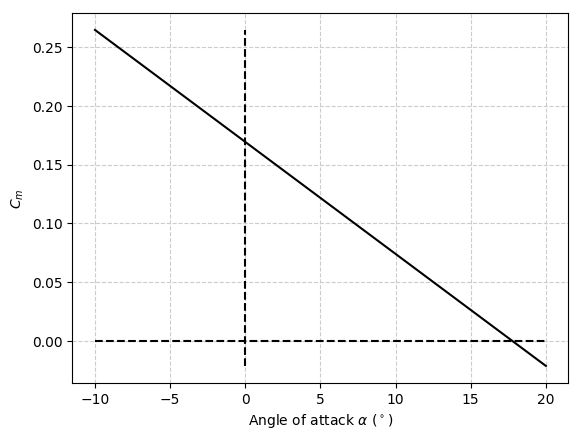

Wing AC distance to CG: 0.065 (m)
Canard AC distance to CG: 0.333 (m)


In [37]:
using PyPlot

theta_co = 3*pi/180   # (rad) initial angle of attack of canard
w_pos = 0       # (m) position wing nose
c_pos = -0.3    # (m) position of LE canard from nose of wing
CG_pos = 0.07  # (m) position of CG from nose of wing

l_c = abs(((c_pos+c_AC)-w_pos) - CG_pos)
l_w = w_AC - CG_pos
Vr = (l_c*c_Sref) / (l_w*w_Sref)

println("Wing AC distance to CG: $(round(l_w,3)) (m)")
println("Canard AC distance to CG: $(round(l_c,3)) (m)")

Cm(alpha_rad) = ( Vr*c_CLalpha*(theta_co+alpha_rad) - 
                    w_CLalpha*alpha_rad - 
                    (Vr*c_Cm + w_Cm)
                )

x = [i*pi/180 for i in -10:0.25:20]
y = Cm(x)

plot(x*180/pi,y, "k")
plot([minimum(x), maximum(x)]*180/pi, [0,0], "--k")
plot([0,0],[minimum(y), maximum(y)], "--k")
xlabel(L"Angle of attack $\alpha$ ($^\circ$)")
ylabel(L"$C_m$")
grid(true, color="0.8", linestyle="--")

This looks off, but lets compare it with what XFLR5 predicts:

<img src="img/plane00.png" alt="Pic here" style="width:1200px">
<img src="img/plane00curves.png" alt="Pic here" style="width:1200px">

The freak! I supressed the body, and now everything is way off! (green curve = no body, white curve = with body). Is it that now the canard's downwash is messing up the wing? Let's move the canard out of the plane of the wing.

<img src="img/plane01.png" alt="Pic here" style="width:1200px">
<img src="img/plane01curves.png" alt="Pic here" style="width:1200px">

That's it! I'm done with XLFR5. I don't trust it at all (or at least I don't know what is it reporting as Cm). I'm just moving back to FLOWVLM.

**UPDATE20171127**: XFLR5 is right, what happens is that by moving the canard up or down we are increasing the moment arm where the drag acts.

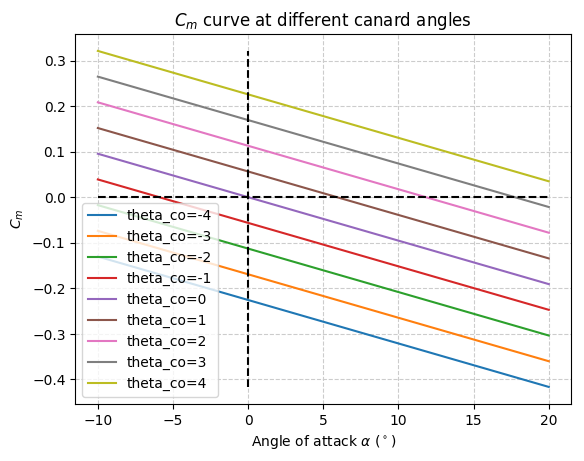

PyObject <matplotlib.text.Text object at 0x7f27ec030d90>

In [54]:
c_pos = -0.3    # (m) position of LE canard from nose of wing

l_c = abs(((c_pos+c_AC)-w_pos) - CG_pos)
Vr = (l_c*c_Sref) / (l_w*w_Sref)

x = [i*pi/180 for i in -10:0.25:20]
max_y, min_y = -Inf, Inf
for i in -4:1:4
    theta_co = i*pi/180
    y = Cm(x)
    plot(x*180/pi, y, label="theta_co=$i")
    max_y = maximum(vcat(y,max_y))
    min_y = minimum(vcat(y,min_y))
end
plot([minimum(x), maximum(x)]*180/pi, [0,0], "--k")
plot([0,0],[min_y, max_y], "--k")
xlabel(L"Angle of attack $\alpha$ ($^\circ$)")
ylabel(L"$C_m$")
grid(true, color="0.8", linestyle="--")
legend(loc="best")
title(L"$C_m$ curve at different canard angles")

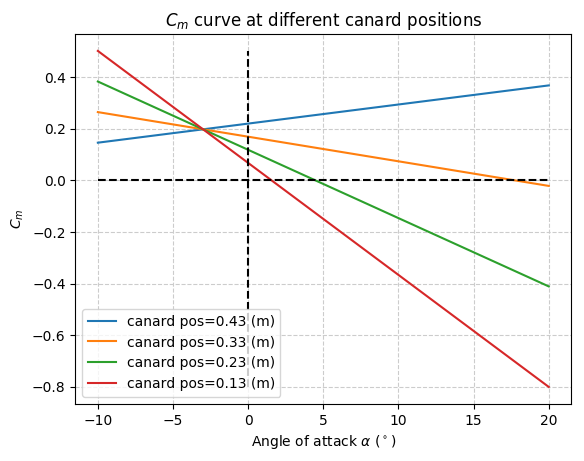

PyObject <matplotlib.text.Text object at 0x7f27ebc3b8d0>

In [58]:

theta_co = 3*pi/180


max_y, min_y = -Inf, Inf

x = [i*pi/180 for i in -10:0.25:20]
for c_pos in -0.4:0.1:-0.1
    l_c = abs(((c_pos+c_AC)-w_pos) - CG_pos)
    Vr = (l_c*c_Sref) / (l_w*w_Sref)
    
    y = Cm(x)
    plot(x*180/pi, y, label="canard pos=$(round(l_c,2)) (m)")
    max_y = maximum(vcat(y,max_y))
    min_y = minimum(vcat(y,min_y))
end
plot([minimum(x), maximum(x)]*180/pi, [0,0], "--k")
plot([0,0],[min_y, max_y], "--k")
xlabel(L"Angle of attack $\alpha$ ($^\circ$)")
ylabel(L"$C_m$")
grid(true, color="0.8", linestyle="--")
legend(loc="best")
title(L"$C_m$ curve at different canard positions")

# TAKE-AWAYS

* It seems that the distance from the canard to the CG is the most sensitive parameter for stability, along with the AOA of the canard. We definitely flew with an unstable configuration (either an AOA for Cm stabilization that stalls the plane, or a unstable Cm curve with the canard deflected down). We need to have a setup of at least REDESIGN #1, but with our current wing the minimum take-off speed we can get is about 8.5 m/s.
* By increasing either span or chord of the main wing (REDESIGNS #3 and #4) the take-off speed can go as low as 6.8 m/s, but we still have to include in the calculation the increased weight for the bigger wing.
* Rough estimates of drag at 8 m/s are around 0.6 N, and motor static tests show they provide a thrust of 2.37 N  (considering fuselage obstruction). I think we have enough power to climb with ease.
* Before every test, make sure all control surface are responding well.
* Mount the winglet to the wing's spar instead of just the foam.
* Find a more structurally-sound way of attaching the twin boom. Would it be better to attach it to the fuselage instead of the wing? Also, the videos show the canard fluttering.